In [89]:
import pandas as pd

df = pd.read_csv('dados_ficticios.csv')

In [90]:
df.head(10)

,Categoria,Valor_1,Valor_2,Valor_3,Data
0,C,53.417560,126.034826,1,2023-01-01
1,D,68.761708,131.230224,2,2023-01-02
2,A,59.504238,100.640083,6,2023-01-03
3,C,44.230963,84.931643,5,2023-01-04
4,C,41.015853,109.199443,9,2023-01-05
5,D,54.919192,86.445693,5,2023-01-06
6,A,36.797668,140.267745,2,2023-01-07
7,A,68.314588,102.730707,4,2023-01-08
8,C,61.794401,92.693569,9,2023-01-09
9,B,45.308243,103.693606,1,2023-01-10


In [91]:
df.info

<bound method DataFrame.info of     Categoria    Valor_1     Valor_2  Valor_3        Data
0           C  53.417560  126.034826        1  2023-01-01
1           D  68.761708  131.230224        2  2023-01-02
2           A  59.504238  100.640083        6  2023-01-03
3           C  44.230963   84.931643        5  2023-01-04
4           C  41.015853  109.199443        9  2023-01-05
..        ...        ...         ...      ...         ...
995         A  45.120886   80.856982        4  2025-09-22
996         A  71.573082  106.875758        7  2025-09-23
997         D  43.942851   99.026953        6  2025-09-24
998         D  57.420954  100.655940        2  2025-09-25
999         C  52.992926   84.830093        8  2025-09-26

[1000 rows x 5 columns]>

In [92]:
df.describe()

,Valor_1,Valor_2,Valor_3
count,1000.000000,1000.000000,1000.000000
mean,50.401664,100.759179,5.014000
std,10.012925,19.673028,2.588533
min,21.037446,39.609757,1.000000
25%,43.749954,87.668313,3.000000
50%,50.366335,100.416802,5.000000
75%,56.815984,113.760305,7.000000
max,80.788808,163.862151,9.000000


In [93]:
filter = df[(df['Categoria'] == 'A') & (df['Valor_1'] > 60)]
filter.head(20)

,Categoria,Valor_1,Valor_2,Valor_3,Data
7,A,68.314588,102.730707,4,2023-01-08
30,A,65.511520,101.140262,2,2023-01-31
35,A,67.553408,121.450147,6,2023-02-05
74,A,69.647251,97.230880,5,2023-03-16
87,A,63.668743,100.293764,1,2023-03-29
152,A,60.062928,76.601663,5,2023-06-02
178,A,62.012139,114.736878,1,2023-06-28
185,A,66.764373,74.914212,7,2023-07-05
217,A,63.556379,84.016160,9,2023-08-06
228,A,74.457520,96.390402,3,2023-08-17


In [94]:
df['Data'] = pd.to_datetime(df['Data'])


In [95]:
df = df[(df['Data'] >= '2023-05-01') & (df['Data'] <= '2023-05-31')]
df.head(10)

,Categoria,Valor_1,Valor_2,Valor_3,Data
120,D,44.076061,113.927749,6,2023-05-01
121,A,41.360092,119.106104,5,2023-05-02
122,B,50.485216,101.768138,9,2023-05-03
123,C,41.690499,129.550602,2,2023-05-04
124,A,52.704568,77.166218,8,2023-05-05
125,D,49.497619,96.126811,5,2023-05-06
126,B,47.610520,85.663554,2,2023-05-07
127,A,40.924363,62.669268,6,2023-05-08
128,D,44.232287,98.346386,8,2023-05-09
129,D,57.553912,97.565050,4,2023-05-10


In [96]:
agrupado_media = df.groupby('Categoria')[['Valor_1', 'Valor_2']].mean()

In [97]:
agrupado_media

,Valor_1,Valor_2
Categoria,,
A,47.012307,101.616545
B,49.047868,93.715846
C,39.910509,103.563094
D,48.450760,101.268104


In [98]:
agrupado_max = df.groupby('Categoria')[['Valor_1', 'Valor_2']].max()

In [99]:
agrupado_max 

,Valor_1,Valor_2
Categoria,,
A,57.513871,137.081851
B,50.485216,101.768138
C,49.339202,129.550602
D,57.553912,137.691726


In [100]:
agrupado_custom = df.groupby('Categoria').agg({
    'Valor_3': 'sum',
    'Categoria': 'count'
}).rename(columns={'Categoria': 'Contagem'})
print(agrupado_custom)

           Valor_3  Contagem
Categoria                   
A               58        12
B               11         2
C               38         7
D               50        10


In [101]:
import matplotlib.pyplot as plt

In [102]:
media_valor_1 = df.groupby('Categoria')['Valor_1'].mean()

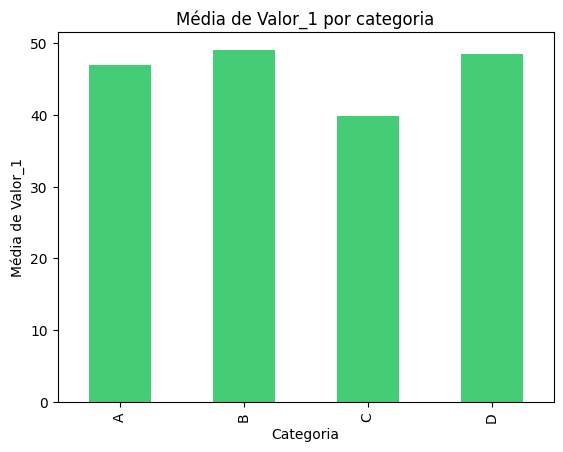

In [103]:
media_valor_1.plot(kind='bar', color='#4c7', title='Média de Valor_1 por categoria')
plt.xlabel('Categoria')
plt.ylabel('Média de Valor_1')
plt.show()